In [ ]:
NAME = "Magali"
COLLABORATORS = "NA"

---


# CS110 Spring 2020 Assignment - Indexing Techniques and Data Structures.


## Overview

 In this assignment, you  will research  Counting Bloom Filters (CBFs), which are data structures that extend the standard Bloom Filters. You will design and implement in Python a set of CBFs initialized at a given false positive rate, and will need to summarize your findings in a report. A report structured has been provided for you in the form of enumerated tasks, which you should follow.
 
 ## Intended Style and Key Audience
 
Your report needs to be written in the style of a chapter from the Cormen textbook (i.e., exhibiting academic rigor and clear explanations) or a Wikipedia page on the subject (i.e., a general overview on a topic that will be peer-reviewed by the world-wide community). Thus, with a beginner’s audience in mind, your report needs to: 

* Carefully explain the concepts of a CBFs, 
* Include details on your CBFs design, 
* Perform an analysis of your implementation and experimental results pertaining to your Python implementation and 
* Perform a critical comparison analysis between the experimental results and the theoretically predicted ones. 
* Use the provided code cells to include all your code, and if these are not enough, please add more cells which you deem necessary.
* Use the same function names provided in the template. 
* Thoroughly describe the algorithmic strategies you are employing in a given question. To do so, feel free to include extra Markdown cells whenever relevant--you may find this [how-to-guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) helpful. 

Make sure you properly cite your sources of information. 

## Notes on the Submission Materials

1. Your **first resource** should be a PDF file created from the Jupyter notebook template provided in these instructions. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your **second resource** must be a single Jupyter Notebook named “Dumbledore.ipynb”. Alternatively, you can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore, the Jupyter notebook submitted as part of such zip file should still be named “Dumbledore.ipynb”!).

## Notes on the Grading Rubrics

* This is a strictly individual assignment. Everything you submit must reflect your own writing and coding. Please do refer to the course guidelines on the syllabus namely in what constitutes plagiarism. 
* All the tasks will be graded on the indicated companion LOs; please make sure to consult their descriptions and rubrics in the course syllabus to maximally align your approach to them. You will not be penalized for not attempting the optional challenge.
* As per the course’s policy on the syllabus, you will need to footnote **at least three HCs** by including a meaningful justification of the application of each HC and how they enabled you to complete part of your work on this assignment. Please refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work.

## Report Structured Tasks

### Task 1. [#responsibility] [appropriate LO for the make-up work] 

Take a screenshot of your CS110 dashboard on Forum where the following is visible: 
* your name. 
* your absences for the course have been set to excused up to the end of week 7 (inclusively). Submit this screenshot as a PNG file on your Jupyter notebook. 

In [ ]:
from IPython.display import Image
Image(filename="Dashboard Week 7.png")

### Task 2.  [#ComputationalSolutions, #DataStructures, #ComplexityAnalysis]  

Write a summary  of the CBFs as an indexing technique, with their underlying data structure and  hashing functionality. This is,  list all the operations they support. For all CBF operations, include an analysis of their asymptotic order growth (complexity analysis). Give a few examples of practical, real-life computational applications that can benefit from using CBFs and carefully justify why. 

__Summary of CBFs as an indexing technique: underlying data structure and hashing functionality__

Counting Bloom Filters (CBFs) can be described as an extension of bloom filters (BFs).

Bloom filters use hash tables (which can be implemented using an array, linked lists, or a defined class) as their underlying structure.  They use many hash functions to map an element as a composition of binary values into multiple keys.  For example, my name "Magali" might, according to 3 defined hash functions, correspond to the indeces/addresses 4, 5, and 33. Hence, with this input, the CBF's binary hash table will have the indeces 4, 5, and 33, be marked as 1. (And, if this was the first value inscribed, all the others would be marked as 0.) 

Consequently, a value can be broken down into a set of keys whose corresponding indeces are then marked as 1 in the hash table.  

Keeping this in mind, to check if a value is present in the set, the algorithm checks for a 1 in each key inputted into the hash function.  If one of the corresponding indeces (outputted by the hash function) is not set to 1, but rather correspond to 0, then the value is for sure not present in the set.  If all the indices/addresses corresponding to the keys are set to 1, then it is possible that the value is present (though not necessarily certain because the 1s might come from the mapping of a combination of other inputs).  In other words, BFs will never return false negatives, though false positives are possible.

How do CBFs differ from BFs?

Instead of operating with binary values, CBFs use counters. Every slot in the hash table, instead of containing 0 or 1, contains an integer corresponding to the number of times this index / address was outputted by a hash function when inputting a key to map a value.

This allows us to insert and delete values. The underlying principle of checking whether a value is present or not stays consistent with the description of BFs.

__Operations supported & their asymptotic order of growth (complexity analysis)__

- Checking whether present (establishes whether an element is possibly included): constant time: O(1) 

- Insertion (inserts a string to the CBF): O(1)

- Deletion (deletes a string from the CBF): O(1)

(Ficara et al., 2006)

__Practical applications__

CBFs can be used for any problems for which we want to make sure not to have false negatives (but are okay with having false positives) and need relatively quick feedback (made possible by CBFs' constant time). 

Some examples of practical applications include:

_Banning malicious websites from the web._  We can use CBFs to check if a web address is malicious. If we know for sure that the address is not in the "malicious addresses" database that we have, then the server can connect without issues. Otherwise, our browser can advise not to continue to the address.

_Checking whether a student has NOT spoken while in class on the Forum._ At Minerva, our platform The Forum keeps track of the students' participation. Considering the model of Minerva's classes, it's very important for the students who have not talked to do so. If their name is not mapped in the indeces of the CBF keeping track of students' speaking, then The Forum knows for sure the student has NOT spoken. The student's box should be marked as red and the Professor consequently knows to call on them, maximing participation and learning.  

### Task 3. [#DataStructures, #PythonProgramming, #CodeReadability] 

Implement in Python 3 your designed CBFs data structure and all its operations using the code template below. Make sure you carefully organize your Python code, write meaningful comments (feel free to use [docstrings](https://www.python.org/dev/peps/pep-0257/)), and provide a thorough justification for your choice of hash functions. 

If you decide to use the Python library  `mmh3`,  you will need to provide a thorough explanation of why you have chosen the hashing functions therein. You may also use  `numpy`, `matplotlib`, `random`, `statistics`, and `math`. If you plan to use any other external library not mentioned in this list, you will need to contact your instructor first for validation.

Make sure to strictly follow the honor code as any plagiarism attempt will be referred to the ASC. Please refer to [resource1](https://new.library.arizona.edu/research/citing/plagiarism) and [resource2](https://poorvucenter.yale.edu/writing/using-sources/understanding-and-avoiding-plagiarism/what-plagiarism), which specify what constitutes plagiarism. 

Demonstrate how your code works by inserting a list of words in [Shakespeare’s works](https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt). The following lines of code will create such a list of words in Python:

```python
txt_file = open("t8.shakespeare.txt", "r")

entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
```

Feel free to use another interesting dataset for further validation, but this is optional.

Below, I use the Python library hashlib to obtain my hash functions. As we saw in class 7.1, it is hard to have a good-performing hash function.  The hash function in this hashlib package have been developed by experts and tested on large sets of data (keys).  They are guaranteed to be good hash functions, unlike ones I might come up with, hence my reliance on them. What do I mean by good?

(1) They likely satisfy the assumption of simple uniform hashing. Each hash function output is as close to random (though deterministically) as possible. This reduces the mapping of the keys to the same indexes, increasing the chances that the element is really there when the search() function returns True (or has found all the hash values for the key). 

(2) They are efficient. They arrive at the hash value in a non-redundant manner.

With these criterions satisfied, I can rest assured that the CBF will have close-to-ideal i.e. reliable hash function outputs. 

##### Building a class of CountingBloomFilter

In [1]:
# Import relevant library
import math
import hashlib

In [2]:
class CountingBloomFilter(object):
    """Implements the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter 
    """
    
    
    def __init__(self, fpr, num_item):
        """
        Defines the following parameters of a CBF:
        - fpr: float, false positive rate
        - memory_size: int, memory size
        - num_item: int, number of items stored
        - num_hashfn: int, number of hash functions
        - 
        - storage: list, stores hash function values 
                   i.e.  the hash table / CBF
        """
        
        # Chosen arguments are false positive rate & number of items
        self.fpr = fpr # false positive rate
        if num_item == 0:
            raise ValueError("There must be at least one element that will be stored to create a CBF.")
        self.num_item = num_item # number of items
        
        # Define the "memory" size (bits) needed
        # a function of the false positive rate and the number of items
        memory_size = -1*round((self.num_item * math.log(self.fpr))/(math.log(2))**2)
        # Reference for above formula: (Boyd, 2014)
        # https://stackoverflow.com/questions/658439/how-many-hash-functions-does-my-bloom-filter-need
        self.memory_size = memory_size # in bits
        self.storage_length = self.memory_size
        ## Convert memory size (bits) to size of list required
        # self.storage_length = round(memory_size/32) # assuming an integer is 32 bits        
        # Create the corresponding list initiated with 0s
        self.storage = [0] * self.storage_length
        
        # Define the number of hash functions needed
        # to obtain the false positive rate 
        # given the number of items and memory size
        num_hashfn = round(self.memory_size / self.num_item * math.log(2))
        # Reference for above formula: (Boyd, 2014)
        # https://stackoverflow.com/questions/658439/how-many-hash-functions-does-my-bloom-filter-need
        self.num_hashfn = num_hashfn
        # Check that it's within bounds of CBF i.e. more than 1 
        # and available predefined hash functions i.e. less than 8
        if self.num_hashfn < 1:
            self.num_hashfn = 1
            print("Recalibrated number of hash functions needed to 1.")
        if self.num_hashfn > 5:
            self.num_hashfn = 5
            print("Recalibrated number of hash functions needed to 5.")
        # Create corresponding hash functions
        hash_funs = []
        self.hash_funs = self.set_hash_funs(self.num_hashfn)
    
    
    def set_hash_funs(self, num):
        """
        Creates/gets required number of hash functions
        """
    
        # list to collect functions
        hash_funs = [hashlib.sha1] # populate with first hash function
        # Reference for collecting functions in a list:
        # https://stackoverflow.com/questions/27472704/store-functions-in-list-and-call-them-later
        # Add number of required hash functions
        if num >= 2:
            hash_funs.append(hashlib.sha384)
        if num >= 3:
            hash_funs.append(hashlib.sha224)
        if num >= 4:
            hash_funs.append(hashlib.sha256)
        if num >= 5:
            hash_funs.append(hashlib.sha512)
        #if num >= 6:
            #hash_funs.append(hashlib.sha384)
        #if num >= 7:
            #hash_funs.append(hashlib.blake2b)
        #if num >= 8:
            #hash_funs.append(hashlib.blake2s)
        # Reference for above functions' availability:
        # https://docs.python.org/3/library/hashlib.html 
       
        return hash_funs

    
    def hash_cbf(self, item):
        """
        Returns hash values of an item
        using hash functions
        """
        if type(item) == str:
            item = item.encode('utf-8')
        
        hash_lst = [] # list of hash values
        
        # go through all hash functions
        for i in range(0, len(self.hash_funs)): 
            # retrieve hash function 
            hash_fun = self.hash_funs[i] 
            # use hash function
            hash_val = hash_fun(item)
            # print(hash_val)
            # convert hash value to integers
            hash_idx = int(hash_val.hexdigest(), 16)
            # print(hash_idx)
            # print(self.storage_length)
            idx = int(hash_idx % self.storage_length)
            # print(idx)
            # append returned value from hash function
            hash_lst.append(idx) 
        return hash_lst # return list of hash values 
    
        
    def search(self, item):
        """
        States whether an element exists
        Returns boolean:
        True = possibly exists
        False = for sure does not exist
        """
           
        exists = True
        # a CBF returns false positives 
        # but never false negatives
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # go through the CBF 
        # and check corresponding hash values
        for i in h_values:
            # print("Checking keys.")
            # if corresponding hash value isn't marked
            # print(self.storage[i])
            if self.storage[i] == 0: 
                # element does not exist
                exists = False
                print("Element", item, "does not exist here.")
                return exists
        if exists:
            print("Element", item, "might exist here.")
            
        return exists
       
        
    def insert(self, item):
        """
        Adds an element to the CBF
        by adding its corresponding hash values 
        """
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # add 1 to each index corresponding to the hash value
        for i in h_values:
            self.storage[i] += 1 
      
    
    def delete(self, item):
        """
        Removes an element from the CBF
        by subtracting its corresponding hash values
        """
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # check if element exists
        exist = self.search(item)
        
        # if it exists, remove each corresponding hash value
        if exist: 
            for i in h_values:
                self.storage[i] -= 1 
            print("Element", item, "deleted.")
        else:
            print("No need to delete the element:", item, ". It does not exist in the CBF.")          

##### Demonstrating how my code works

In [3]:
txt_file = open("t8.shakespeare.txt", "r")

entries = txt_file.read().split(' ')
lines = [string.replace('\n', '') for string in entries]
all_text = [line for line in lines if line != '']
# all_text = [line.encode('utf-8') for line in lines] 

In [4]:
# Create a CBF
test_CBF = CountingBloomFilter(0.01, 3)

# Insert test elements
test_CBF.insert(all_text[2])
test_CBF.insert(all_text[1])
test_CBF.insert(all_text[0])

# Try to find test elements
test_CBF.search('jdfhjhsdhjkshjhfds')
test_CBF.delete('This')
test_CBF.delete(all_text[2])

Recalibrated number of hash functions needed to 5.
Element jdfhjhsdhjkshjhfds does not exist here.
Element This might exist here.
Element This deleted.
Element the might exist here.
Element the deleted.


In [5]:
# Create a CBF
test_CBF = CountingBloomFilter(0.01, len(all_text))

# Insert test elements
[test_CBF.insert(word) for word in all_text]

# Try to find test elements
test_CBF.search('This')
test_CBF.search('Shakespeare')
test_CBF.search('fmdnjjshh')
test_CBF.delete('Shakespeare')
test_CBF.delete('is')

Recalibrated number of hash functions needed to 5.
Element This might exist here.
Element Shakespeare might exist here.
Element fmdnjjshh does not exist here.
Element Shakespeare might exist here.
Element Shakespeare deleted.
Element is might exist here.
Element is deleted.


### Task 4 [#ComplexityAnalysis, #ComputationalCritique].

Now you will verify the effectiveness of your CBF implementation by testing how well the implementation matches or diverges from the theoretical findings. The following tasks will help you make this computational analysis. Explicitly include any assumptions you have made to arrive at your results. If there are any discrepancies between the theory and the computational experiments, provide an explanation for these.

1. [#DataStructures] Create several CBFs (at least 10) for different FPRs, and evaluate how the memory size scales with the FPR. 
2. [#DataStructures] How does the memory size scale with the number of items stored, for a fixed FPR?
3. [#DataStructures, #ComplexityAnalysis] How does the actual FPR scale with the number of hash functions?
4. [#DataStructures, #ComplexityAnalysis] How does the access time to hashed values scale with the number of items stored in a CBF kept at constant FPR?


1. Theoretical findings.
2. Experimental findings.
3. Assumptions to arrive at result.
3. Explanation for discrepancy between 1. and 2.  

In [6]:
import matplotlib.pyplot as plt

__1. [#DataStructures] Create several CBFs (at least 10) for different FPRs, and evaluate how the memory size scales with the FPR.__ 


In [7]:
x = []
y = []

def create_CBF(fpr):
    """
    Creates a CBF with requested 
    false positive rate and 
    number of items in Shakespeare text
    """
    
    # create the instance of the CBF
    CBF = CountingBloomFilter(fpr, len(all_text))
    # cbtain memory size 
    print("With", len(all_text), "items and a false positive rate of", fpr, "the created CBF memory size is:", CBF.memory_size, 'bits.')
    # add values to lists for later graphing
    x.append(fpr)
    y.append(CBF.memory_size)
    
    return CBF

In [8]:
CBF1 = create_CBF(0.01)

Recalibrated number of hash functions needed to 5.
With 896183 items and a false positive rate of 0.01 the created CBF memory size is: 8589966 bits.


In [9]:
CBF2 = create_CBF(0.20)

With 896183 items and a false positive rate of 0.2 the created CBF memory size is: 3002064 bits.


In [10]:
CBF3 = create_CBF(0.003)

Recalibrated number of hash functions needed to 5.
With 896183 items and a false positive rate of 0.003 the created CBF memory size is: 10835722 bits.


In [11]:
CBF4 = create_CBF(0.4)

With 896183 items and a false positive rate of 0.4 the created CBF memory size is: 1709146 bits.


In [12]:
CBF5 = create_CBF(0.50)

With 896183 items and a false positive rate of 0.5 the created CBF memory size is: 1292919 bits.


In [13]:
CBF6 = create_CBF(0.0006)

Recalibrated number of hash functions needed to 5.
With 896183 items and a false positive rate of 0.0006 the created CBF memory size is: 13837786 bits.


In [14]:
CBF7 = create_CBF(0.70)

With 896183 items and a false positive rate of 0.7 the created CBF memory size is: 665301 bits.


In [15]:
CBF8 = create_CBF(0.08)

With 896183 items and a false positive rate of 0.08 the created CBF memory size is: 4711210 bits.


In [16]:
CBF9 = create_CBF(0.99)

Recalibrated number of hash functions needed to 1.
With 896183 items and a false positive rate of 0.99 the created CBF memory size is: 18747 bits.


In [17]:
CBF10 = create_CBF(1.0)

Recalibrated number of hash functions needed to 1.
With 896183 items and a false positive rate of 1.0 the created CBF memory size is: 0 bits.


Text(0.5, 1.0, 'Experimental results:\n memory size scaling with FPR')

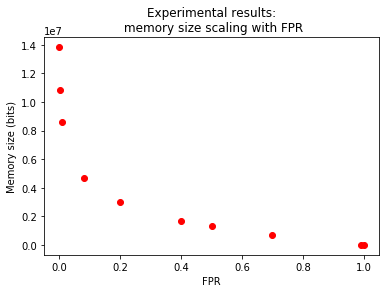

In [18]:
plt.plot(x, y, 'ro') 
plt.xlabel("FPR")
plt.ylabel("Memory size (bits)")
plt.title("Experimental results:\n memory size scaling with FPR")

Theoretically, memory size should scale with the FPR in a manner that is exponentially decaying as defined by the below mathematical function:

This is in accordance with the experimental results illustrated in the graph above.

__2. [#DataStructures] How does the memory size scale with the number of items stored, for a fixed FPR?__


In [19]:
x = []
y = []

def create_CBF(num):
    """
    Creates a CBF with requested 
    number of items and fixed
    false positive rate
    """
    
    # create the instance of the CBF
    CBF = CountingBloomFilter(0.2, num)
    # obtain memory size 
    print("With", num, "items and a false positive rate of", 0.2, "the created CBF memory size is:", CBF.memory_size, 'bits.')
    # add values to lists for later graphing
    x.append(num)
    y.append(CBF.memory_size)
    
    return CBF

In [20]:
CBF1 = create_CBF(0)

ValueError: There must be at least one element that will be stored to create a CBF.

In [21]:
CBF2 = create_CBF(1)

With 1 items and a false positive rate of 0.2 the created CBF memory size is: 3 bits.


In [22]:
CBF3 = create_CBF(2)

With 2 items and a false positive rate of 0.2 the created CBF memory size is: 7 bits.


In [23]:
CBF4 = create_CBF(10)

With 10 items and a false positive rate of 0.2 the created CBF memory size is: 33 bits.


In [24]:
CBF5 = create_CBF(50)

With 50 items and a false positive rate of 0.2 the created CBF memory size is: 167 bits.


In [25]:
CBF6 = create_CBF(100)

With 100 items and a false positive rate of 0.2 the created CBF memory size is: 335 bits.


In [26]:
CBF7 = create_CBF(1000)

With 1000 items and a false positive rate of 0.2 the created CBF memory size is: 3350 bits.


In [27]:
CBF8 = create_CBF(10000)

With 10000 items and a false positive rate of 0.2 the created CBF memory size is: 33498 bits.


In [28]:
CBF9 = create_CBF(100000)

With 100000 items and a false positive rate of 0.2 the created CBF memory size is: 334983 bits.


In [29]:
CBF10 = create_CBF(1000000)

With 1000000 items and a false positive rate of 0.2 the created CBF memory size is: 3349834 bits.


Text(0.5, 1.0, 'Experimental results:\n memory size scaling with number of items stored')

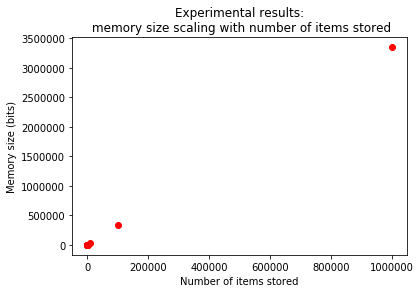

In [30]:
plt.plot(x, y, 'ro') 
plt.xlabel("Number of items stored")
plt.ylabel("Memory size (bits)")
plt.title("Experimental results:\n memory size scaling with number of items stored")

Theoretically, memory size should scale with the number of items stored in a linear manner as defined by the below mathematical function:

This is in accordance with the experimental results illustrated in the graph above.

__3. [#DataStructures, #ComplexityAnalysis] How does the actual FPR scale with the number of hash functions?__

In [31]:
x = []
y = []

def create_CBF(fpr):
    """
    Creates a CBF with requested 
    false positive rate and 
    number of items in Shakespeare text
    """
    length = 1000
    
    # create the instance of the CBF
    CBF = CountingBloomFilter(fpr, length)
    # obtain memory size 
    print("With", length, "items and a false positive rate of", fpr, "the number of hash functions is:", len(CBF.hash_funs), '.')
    # add to lists for later graphing
    x.append(len(CBF.hash_funs))
    y.append(fpr)
    
    return CBF 

In [32]:
CBF11 = create_CBF(0.00001)

Recalibrated number of hash functions needed to 5.
With 1000 items and a false positive rate of 1e-05 the number of hash functions is: 5 .


In [33]:
CBF12 = create_CBF(0.001)

Recalibrated number of hash functions needed to 5.
With 1000 items and a false positive rate of 0.001 the number of hash functions is: 5 .


In [34]:
CBF13 = create_CBF(0.01)

Recalibrated number of hash functions needed to 5.
With 1000 items and a false positive rate of 0.01 the number of hash functions is: 5 .


In [35]:
CBF14 = create_CBF(0.02)

Recalibrated number of hash functions needed to 5.
With 1000 items and a false positive rate of 0.02 the number of hash functions is: 5 .


In [36]:
CBF15 = create_CBF(0.0222)

With 1000 items and a false positive rate of 0.0222 the number of hash functions is: 5 .


In [37]:
CBF16 = create_CBF(0.0221)

Recalibrated number of hash functions needed to 5.
With 1000 items and a false positive rate of 0.0221 the number of hash functions is: 5 .


In [38]:
CBF17 = create_CBF(0.0442)

With 1000 items and a false positive rate of 0.0442 the number of hash functions is: 4 .


In [39]:
CBF18 = create_CBF(0.0884)

With 1000 items and a false positive rate of 0.0884 the number of hash functions is: 3 .


In [40]:
CBF19 = create_CBF(0.177)

With 1000 items and a false positive rate of 0.177 the number of hash functions is: 2 .


In [41]:
CBF20 = create_CBF(0.354)

With 1000 items and a false positive rate of 0.354 the number of hash functions is: 1 .


In [42]:
CBF21 = create_CBF(0.708)

Recalibrated number of hash functions needed to 1.
With 1000 items and a false positive rate of 0.708 the number of hash functions is: 1 .


Text(0.5, 1.0, 'Experimental results:\n FPR scaling with number of hash functions')

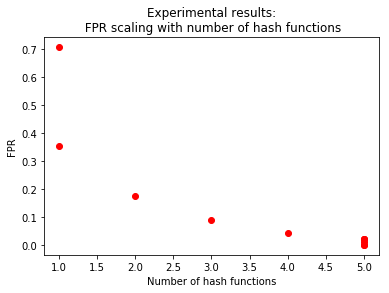

In [43]:
plt.plot(x, y, 'ro') 
plt.xlabel("Number of hash functions")
plt.ylabel("FPR")
plt.title("Experimental results:\n FPR scaling with number of hash functions")

Theoretically, the FPR should scale in a negative manner (exponentially decaying, at least in the beginning)  with the number of hash functions. The fewer hash functions, the higher the FPR, as the more likely that a (uncoded and not present) key will have the same hash value(s) as another (already incoded and actually present) key.  Consequently, moving from one hash function to two hash functions will create a dramastic improvement in the accuracy of the FPR. The more hash functions (up to a limit), the lower the rate of false positives.  However, the law of diminishing marginal utility exists; if we already have many hash functions the false positive rate will not improve (i.e. decrease) in a significant manner. 

Experimental results (graphed above) support this.  Furthermore, they illustrate the non-continuous relationship between hash functions and FPRs. As it is not possible to have 1.5 hash functions, a whole number of hash functions will encompass a range of possible FPRs.  Specifically, for my CBF and according to the above tests, these are: 

ideally "0" hash functions, recalibrated to 1 hash function: 0.707 < fpr 

1 hash function: 0.354 <= fpr <= 0.707

2 hash functions: 0.177 <= fpr < 0.354

3 hash functions: 0.0884 <= fpr < 0.177

4 hash functions: 0.0442 <= fpr < 0.0884

5 hash functions: 0.0222 <= fpr < 0.0442

ideally 6+ hash functions, recalibrated to 5 hash functions: fpr < 0.0222

__4. [#DataStructures, #ComplexityAnalysis] How does the access time to hashed values scale with the number of items stored in a CBF kept at constant FPR?__

In [44]:
import time

In [45]:
def store_items(CBF):
    """
    Populates the CBF with the
    hash values of the specified 
    number of items, taken from 
    Shakespeare's texts.
    """
    for i in range(CBF.num_item):
        CBF.insert(all_text[i])

    return CBF

In [46]:
x = []
y = []

def get_CBF_time(CBF, word):
    """
    Calculates the time elapsed
    when searching for hash values
    of an item in a CBF with given 
    number of items stored.
    """
    # start timer
    start = time.time()
    # access hashed values
    found = CBF.search(word)
    # end timer
    end = time.time()
    # calculate time elapsed
    timing = end - start
    # print the outcome 
    print("For a CBF with", CBF.num_item, "items, the access time to the hashed values of the item", word, "is:", timing, "seconds.")
    
    # add to lists for later reference
    x.append(CBF.num_item)
    y.append(timing)

In [47]:
CBF2 = store_items(CBF2)
get_CBF_time(CBF2, "This")
get_CBF_time(CBF2, "Magali")

Element This might exist here.
For a CBF with 1 items, the access time to the hashed values of the item This is: 0.0001418590545654297 seconds.
Element Magali might exist here.
For a CBF with 1 items, the access time to the hashed values of the item Magali is: 6.604194641113281e-05 seconds.


In [48]:
CBF3 = store_items(CBF3)
get_CBF_time(CBF3, "This")
get_CBF_time(CBF3, "Magali")

Element This might exist here.
For a CBF with 2 items, the access time to the hashed values of the item This is: 0.0002639293670654297 seconds.
Element Magali might exist here.
For a CBF with 2 items, the access time to the hashed values of the item Magali is: 6.008148193359375e-05 seconds.


In [49]:
CBF4 = store_items(CBF4)
get_CBF_time(CBF4, "This")
get_CBF_time(CBF4, "Magali")

Element This might exist here.
For a CBF with 10 items, the access time to the hashed values of the item This is: 0.0003428459167480469 seconds.
Element Magali does not exist here.
For a CBF with 10 items, the access time to the hashed values of the item Magali is: 0.00017571449279785156 seconds.


In [50]:
CBF5 = store_items(CBF5)
get_CBF_time(CBF5, "This")
get_CBF_time(CBF5, "Magali")

Element This might exist here.
For a CBF with 50 items, the access time to the hashed values of the item This is: 0.00032782554626464844 seconds.
Element Magali does not exist here.
For a CBF with 50 items, the access time to the hashed values of the item Magali is: 0.00012803077697753906 seconds.


In [51]:
CBF6 = store_items(CBF6)
get_CBF_time(CBF6, "This")
get_CBF_time(CBF6, "Magali")

Element This might exist here.
For a CBF with 100 items, the access time to the hashed values of the item This is: 0.00027298927307128906 seconds.
Element Magali does not exist here.
For a CBF with 100 items, the access time to the hashed values of the item Magali is: 6.67572021484375e-05 seconds.


In [52]:
CBF7 = store_items(CBF5)
get_CBF_time(CBF7, "This")
get_CBF_time(CBF7, "Magali")

Element This might exist here.
For a CBF with 50 items, the access time to the hashed values of the item This is: 0.00022602081298828125 seconds.
Element Magali does not exist here.
For a CBF with 50 items, the access time to the hashed values of the item Magali is: 6.580352783203125e-05 seconds.


In [53]:
CBF8 = store_items(CBF8)
get_CBF_time(CBF8, "This")
get_CBF_time(CBF8, "Magali")

Element This might exist here.
For a CBF with 10000 items, the access time to the hashed values of the item This is: 9.107589721679688e-05 seconds.
Element Magali does not exist here.
For a CBF with 10000 items, the access time to the hashed values of the item Magali is: 4.100799560546875e-05 seconds.


In [54]:
CBF9 = store_items(CBF9)
get_CBF_time(CBF9, "This")
get_CBF_time(CBF9, "Magali")

Element This might exist here.
For a CBF with 100000 items, the access time to the hashed values of the item This is: 0.000102996826171875 seconds.
Element Magali does not exist here.
For a CBF with 100000 items, the access time to the hashed values of the item Magali is: 4.291534423828125e-05 seconds.


Text(0.5, 1.0, 'Experimental results:\n Access time scaling with number of items stored')

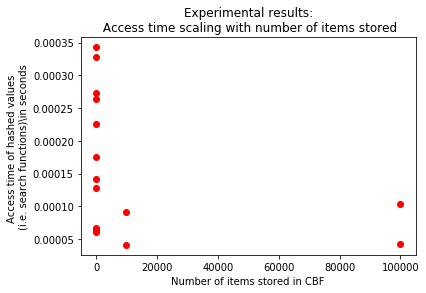

In [55]:
plt.plot(x, y, 'ro') 
plt.xlabel("Number of items stored in CBF")
plt.ylabel("Access time of hashed values \n(i.e. search functions)\in seconds")
plt.title("Experimental results:\n Access time scaling with number of items stored")

Theoretically, the access time should not be dependent on the number of items stored. This is the value of CBFs.  Search time is O(1) as the same number of hash values are checked (simply for a conditional statement checking if there is a corresponding "0" of not). The amount of checking does not relate to the number of items but rather to the number of hash functions, which is constant for a CBF and all the corresponding access to hash values.

Experimental results (graphed above) kind of support this no scaling.  The values all lie below 0.0011 seconds but are scattered.  This can likely be explained by noise (from my computer) when measuring computation time.

### Task 5. [#ComputationalCritique]

Identify and list (if any) corner cases for CBFs. Explain why these cases should be taken into account if you are a software engineer.


##### Corner cases

_Creating a CBF with 0 elements._ 

It is possible that the CBF is instanciated with 0 number of items as a parameter. As this (creating a CBF to store 0 elements) would of no value, I take this into account by raising a ValueError: "There must be at least one element that will be stored to create a CBF." This is demonstrated in Task 4 when I call CBF1 = create_CBF(0).

_Passing more elements than originally specified._

Meanwhile, it is possible that a CBF is created to store the hash values for, say, 1000 items. Nevertheless, it might be attempted to store more items than the pre-defined number used to create the CBF. This would compromise the false positives rate, increasing the number of false positive cases than was requested or pre-defined.  It is therefore important to mitigate this from happenning by keeping track of the number of items inserted and removed.  This can be achieved by creating a global variable and raising an error if it becomes higher than the  defined number of items (num_item) of the class.  A possibility, after raising the error, would be to recalibrate the memory size and number of hash functions to accomodate more elements.


_Requiring more (or less) hash functions than provided based on the specified FPR_

Currently, as demonstrated in Part 4, if the requested FPR is greated 0.707 (as in there's a 70.7% chance that the element does not exist when its hash values are found in the CBF), the calculated number of required hash functions in 0. Yet we need at least one. (This is currently taken care of through a conditional recalibration in my CBF class.) However this is not a problem, as it is great that our actual false positive rate is lower than the requested one.

What does pose issue is when the requested FPR is lower than what can be currently provided by the maximum five available hash functions.  Given this minimum viable product, the current lowest rate of false positives than can be expected is 0.0222 (or a 2.22% chance that an element does not really exist even though its hash values are found in the CBF).  In other words, we are currently limited by the number of hash functions. 

Ideally, the CBF class would be able to get the number of hash functions calculated based on the passed RBF rate and number of items stored, irrespective of the size of the number needed.  This would allow it to have very close the desired FPR. To achieve this, we would need to be able to create unlimited numbers of hash functions.  Using a base structure to define the hash functions and then adding some computation to it (that would maintain deterministic, random distribution of hash values) would allow us to create multiple of these.  With this goal in mind, I _drafted_ a class (Appendix A) that would allow the CBF to have a list of hash functions that fits its need. 

_Uniformily random distribution of hash values_

Finally, it is important to keep in mind that we are assuming that the hash functions will return hash values from the keys in a close-to (deterministically) uniformaly random manner.  (This is relied upon when determining, for example, the needed memory size with the given FPR.)  If this assumption is violated then the FPR may not be maintained as multiple keys are mapped to the same indexes, creating a higher likelihood of having overlaps of indexes and consequent false positives.  To minimize this, using excellent hash functions is critical.

## References


Boyd, I. (2014). How many hash functions does my bloom filter need? Retrieved from
https://stackoverflow.com/questions/658439/how-many-hash-functions-does-my-bloom-filter-need.

Ficara, D., Giordano, S., Procisssi, G., & Vitucci, F. (2008). MultiLayer Compressed Counting Bloom Filters. IEEE. doi: 10.1109/INFOCOM.2008.71

## Appendix A: Future Developments


### Creating a CBF with Hashing (OOP in progress)

In [ ]:
class Hashings(object):
    """
    Implements an array of hash functions
    """
    def __init__(self, num_hash, max_val):
        """
        Defines the following parameters of a hashings:
        - hashes: list, contains hash functions
        """
        
        # Define number of hash functions
        self.num_hash = num_hash
        self.max_val = max_val
        
        # Define a list to contain hash functions
        self.hashes = []*num_hash
        
            
    def create_hash(max_val):
        """
        Creates a hash function:
        - hash: function, with input key, 
            output index position WITHIN length  
        """ 
        # Create a random hash function
        # with largest possible output == max_val 
        
        hash_fun = hashlib.md5() #Use the first hash function
        
        return hash_fun 
        
    def add_hash(new_hash):
        """
        Add a hash function to the list of hash functions
        """ 
        self.hashes.append(new_hash)
    
    def remove_hash():
        """
        Removes a hash function from the list of hash functions
        """
        self.num_hash = num_hash-1
        
        new_hashes = []*num_hash
        for i in range(num_hash):
            new_hashes.append(hashes[i])
        self.hashes = new_hashes
        

In [ ]:
class CountingBloomFilter(object):
    """Implements the counting bloom filter which supports:
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter 
    """
    
    def __init__(self, fpr, num_item):
        """
        Defines the following parameters of a CBF:
        - fpr: float, false positive rate
        - memory_size: int, memory size
        - num_item: int, number of items stored
        - num_hashfn: int, number of hash functions
        - 
        - storage: list, stores hash function values 
                   i.e.  the hash table / CBF
        """
        
        # Chosen arguments are false positive rate & number of items
        self.fpr = fpr # false positive rate
        self.num_item = num_item # number of items
        
        # Define the "memory" size (bitsA) needed
        # a function of the false positive rate and the number of items
        memory_size = -1*round((self.num_item * math.log(self.fpr))/(math.log(2))**2) 
        # Reference for above formula: (Boyd, 2014)
        # https://stackoverflow.com/questions/658439/how-many-hash-functions-does-my-bloom-filter-need
        self.memory_size = memory_size
        # Create the corresponding list initiated with 0s
        # convert bits to size of list required
        self.storage_length = round(memory_size/32)
        self.storage = [0] * self.storage_length
        
        # Define the number of hash functions needed
        # to obtain the false positive rate 
        # given the numbe of items and memory size
        num_hashfn = round(self.memory_size / self.num_item * math.log(2))
        # Reference for above formula: (Boyd, 2014)
        # https://stackoverflow.com/questions/658439/how-many-hash-functions-does-my-bloom-filter-need
        self.num_hashfn = num_hashfn
        # Check that it's within bounds of CBF i.e. more than 1
        if self.num_hashfn < 1:
            self.num_hashfn = 1      
        # Create corresponding hash functions
        hash_funs = Hashings(self.num_hashfn, self.storage_length)
        # Limit to number of pre-defined hash functions (8)
        # if self.num_hashfn > 8:
            # self.num_hashfn = 8
        # if self.num_hashfn < 1:
            # self.num_hashfn = 1      
        
    def hash_cbf(self, item):
        """
        Returns hash values of an item
        using hash functions
        """
        
        hash_lst = [] # list of hash values
        
        # go through all hash functions
        for i in range(0, self.hash_funs.getlength()): 
            # retrieve hash function 
            hash_function = hash_functions[i] 
            # use hash function
            idx = hash_function(item)
            # append returned value from hash function
            hash_lst.append(idx) 

        return hash_lst # return list of hash values
        
    def search(self, item):
        """
        States whether an element exists
        Returns boolean:
        True = possibly exists
        False = for sure does not exist
        """
        
        exists = True
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # go through the CBF 
        # and check corresponding hash values
        for i in h_values:
            # if corresponding hash value isn't marked
            if self.storage[i] == 0: 
                # element does not exist
                exists = False
        
        return exists
        
    def insert(self, item):
        """
        Adds an element to the CBF
        by adding its corresponding hash values 
        """
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # add 1 to each index corresponding to the hash value
        for i in h_values:
            self.storage[i] += 1 
            
    def delete(self, item):
        """
        Removes an element from the CBF
        by subtracting its corresponding hash values
        """
        
        # obtain elements's corresponding hash values
        h_values = self.hash_cbf(item)
        
        # check if element exists
        exist = self.search(item)
        
        # if it exists, remove each corresponding hash value
        if exist: 
            for i in h_values:
                self.storage[i] -= 1 
        else:
            print("No need to delete the element:", item, ". It does not exist in the CBF.")
            

## Appendix B: Applied Habits of Mind & Foundational Concepts


__#medium__

I explain in detail (through comments) each method in my CBF class, a unique and very useful type of medium in coding. Prior to creating the class, I furthermore make sure to explain why I chose to use the package hashlib and how it contributes to creating a reliable CBF. 


__#testability__

I clearly explain, through self-explanatory method titles and calls, comments in the methods' code, and informative printed messages, how I assess the accuracy of my CBF by defining reusable methods and passing multiple test cases. This is achieved at the end of Task 3 (in the section titled "demonstrating how my code works") and in Task 4.

__#constraints__

I accurately identify (in my CBF class code) and analyze (in Task 4 and Task 5) the constraint on possibly requiring more hash functions than the currently 5 currently available. I make sure to recalibrate in the code (and to communicate this to the user) the total number of hash functions if the calculation based on the FPR and number of items asks for more than 5 or less than 1 hash functions.  Meanwhile, I identify the limits on the FPR that the current maximum number of hash functions can accomodate. Considering this analysis, I make the first steps towards a solution, by proposing a Hashing class that would allow for the creation of (unlimited, or, rather, as-many-as-needed) hash functions (Appendix A). 

Last but not least, I identify nuanced obstacles and constraints (i.e. corner cases) in Task 5 and outline in detail coding solutions to them.